# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df=pd.merge(study_results,mouse_metadata,how="left")

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mouse_dup=merged_df[merged_df.duplicated(['Mouse ID','Timepoint'],keep=False)]
Mouse_dup_id=Mouse_dup['Mouse ID'].unique()
Mouse_dup_id


                 


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse_df=merged_df[merged_df['Mouse ID'].isin(Mouse_dup_id)]
Mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_df=merged_df[merged_df['Mouse ID']!='g989']
Clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
Clean_df['Mouse ID'].nunique()


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
G=Clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
G['Median']=Clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
G['Variance']=Clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
G['Sem']=Clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Drug_Regimen=G[['mean','Median','Variance','std','Sem']]
Drug_Regimen


,mean,Median,Variance,std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Drug_Regimen_Clean=Clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Drug_Regimen_Clean


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

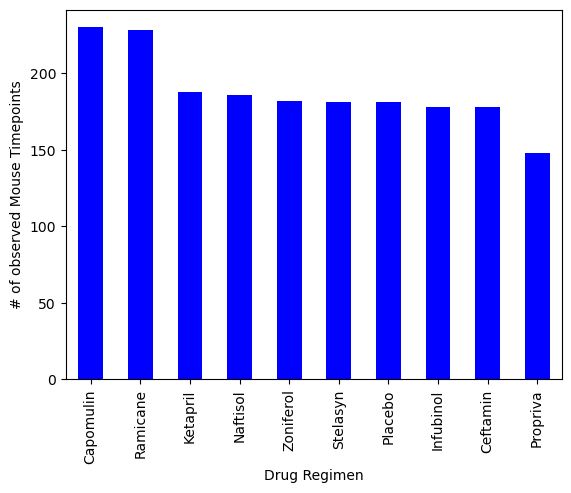

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
three_in_one=Clean_df[['Mouse ID','Timepoint','Drug Regimen']]
values=three_in_one['Drug Regimen'].value_counts()
graph=values.plot(kind='bar',
                  color= 'blue',
                  ylabel='# of observed Mouse Timepoints');
graph;







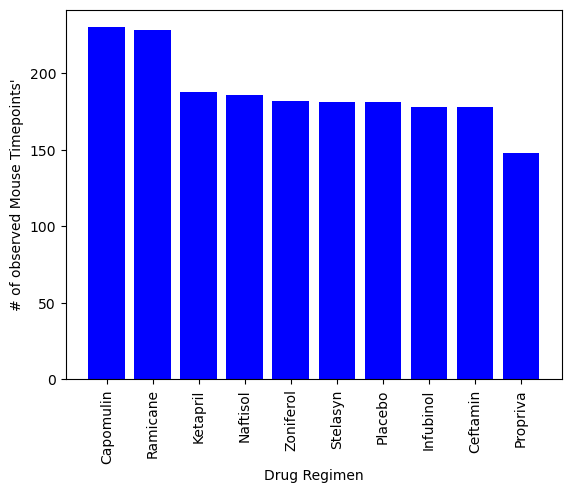

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
values
x_axes=values.index
y_axes=values.values
plt.bar(x_axes,
        y_axes,
        color="blue")
plt.xlabel('Drug Regimen')
plt.ylabel("# of observed Mouse Timepoints'")
        
plt.xticks(rotation=90);

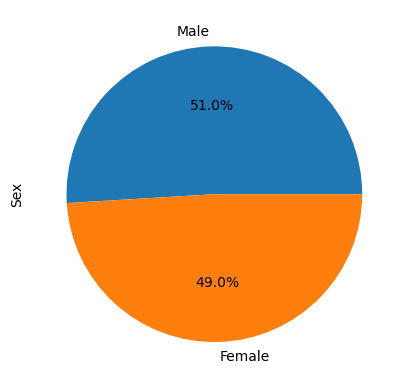

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mouse_pie=Clean_df['Sex'].value_counts()
label=Mouse_pie.index
pie_pie=Mouse_pie.plot(kind="pie",
                       autopct='%1.1f%%',
                       ylabel='Sex')

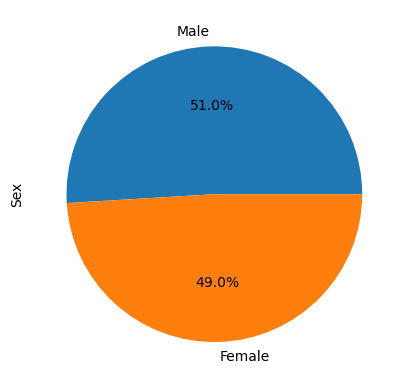

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Mouse_pie=Clean_df['Sex'].value_counts()
label=Mouse_pie.index
plt.pie(Mouse_pie,labels=label,autopct='%1.1f%%');
plt.ylabel("Sex");

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Clean_df
regimens=['Capomulin','Ramicane','Infubinol','Ceftamin']
filtered=Clean_df[Clean_df['Drug Regimen'].isin(regimens)]
# Start by getting the last (greatest) timepoint for each mouse
greatest=filtered.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merged=pd.merge(greatest,Clean_df,on=['Mouse ID','Timepoint'],how='left')
tumor_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


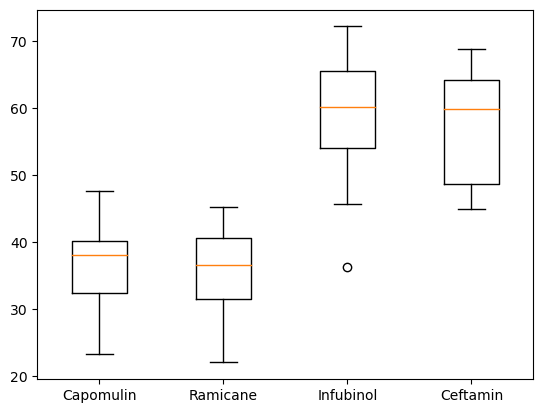

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data,labels=Treatments);

## Line and Scatter Plots

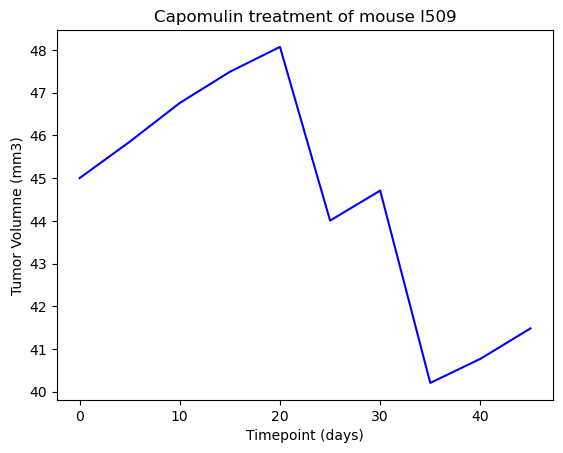

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Id_capomulin='l509'
Mouse_data_cap=Clean_df[(Clean_df['Drug Regimen']=='Capomulin')&(Clean_df['Mouse ID']==Id_capomulin)]
plt.plot(Mouse_data_cap['Timepoint'],Mouse_data_cap['Tumor Volume (mm3)'],color='blue')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volumne (mm3)')
plt.title('Capomulin treatment of mouse l509');
           

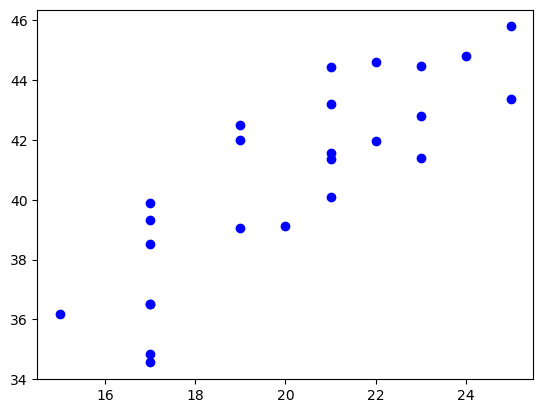

In [76]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data=Clean_df[Clean_df['Drug Regimen']=='Capomulin']
Av_tumor_vol=capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data=pd.merge(capomulin_data,Av_tumor_vol, on="Mouse ID",suffixes=('_orginal','_average'))
unique_cap_data=merged_data.drop_duplicates(subset="Mouse ID")
plt.scatter(unique_cap_data['Weight (g)'],unique_cap_data['Tumor Volume (mm3)_average'],color='blue');

## Correlation and Regression

he correlation between mouse weight and the average tumor volume is 0.84


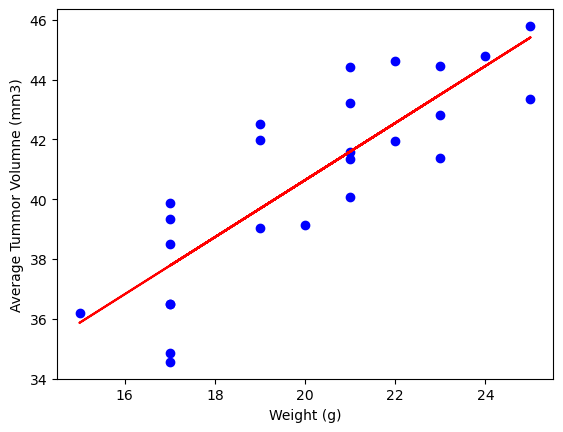

In [88]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient=unique_cap_data['Weight (g)'].corr(unique_cap_data['Tumor Volume (mm3)_average'])
slope, intercept, r_value, p_value, std_err =linregress(unique_cap_data['Weight (g)'],unique_cap_data['Tumor Volume (mm3)_average'])

plt.scatter(unique_cap_data['Weight (g)'],unique_cap_data['Tumor Volume (mm3)_average'],color='blue')
plt.plot(unique_cap_data['Weight (g)'],slope*unique_cap_data['Weight (g)']+ intercept,color='red',label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tummor Volumne (mm3)');

print(f'he correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')